In [8]:
## 解压数据
!unzip -O CP936 data.zip
!mv 数据 data

Archive:  data.zip
   creating: 数据/
   creating: 数据/07056ad5/
  inflating: 数据/07056ad5/.DS_Store  
  inflating: 数据/07056ad5/05cab53b_data.npy  
  inflating: 数据/07056ad5/05cab53b_label.npy  
  inflating: 数据/07056ad5/077a5235_data.npy  
  inflating: 数据/07056ad5/077a5235_label.npy  
  inflating: 数据/07056ad5/09a33eb6_data.npy  
  inflating: 数据/07056ad5/09a33eb6_label.npy  
  inflating: 数据/07056ad5/10e3be44_data.npy  
  inflating: 数据/07056ad5/10e3be44_label.npy  
  inflating: 数据/07056ad5/12210368_data.npy  
  inflating: 数据/07056ad5/12210368_label.npy  
  inflating: 数据/07056ad5/1f740514_data.npy  
  inflating: 数据/07056ad5/1f740514_label.npy  
  inflating: 数据/07056ad5/236dac36_data.npy  
  inflating: 数据/07056ad5/236dac36_label.npy  
  inflating: 数据/07056ad5/2951e154_data.npy  
  inflating: 数据/07056ad5/2951e154_label.npy  
  inflating: 数据/07056ad5/2e9a317e_data.npy  
  inflating: 数据/07056ad5/2e9a317e_label.npy  
  inflating: 数据/07056ad5/3545d29e_data.npy  
  inflating: 数据/07056ad5/3545d29e_lab

In [1]:
import os
import shutil
import glob
import sys
import numpy as np
import random
sys.path.append("/xddata/home/acg1fa4eq1/.conda/envs/unet3d/lib/python3.7/site-packages")



In [ ]:

# 将数据移动到同一个目录下

for folder in os.listdir("data"):
    for file in os.listdir(os.path.join("data",folder)):
        shutil.move(os.path.join("data",folder,file),os.path.join("data",file))
    shutil.rmtree(os.path.join("data",folder))
    

In [2]:

data_list = glob.glob('data/*_data.npy')
ids = []
for file_path in data_list:
    file_name = file_path.split('/')[-1]
    id = file_name.split('_')[0]
    ids.append(id)
    
for id in ids:
    # 检查是否有缺失
    if not os.path.exists(f'data/{id}_data.npy'):
        print(f'label {id} does not exists!')
        
print(f'total data :{len(ids)}')

total data :100


In [3]:
from utils import process_label
# 将所有数据整合成

data_list = []
label_list = []

# 读取每个.npy文件并将其添加到 array_list
for idx in ids:
    data = np.load(f'data/{idx}_data.npy')
    label = process_label(np.load(f'data/{idx}_label.npy'))
    data_list.append(data)
    label_list.append(label)

    
data_array = np.array(data_list)
label_array = np.array(label_list)

data_array = data_array.reshape((data_array.shape[0] * data_array.shape[1] * data_array.shape[2],  data_array.shape[3]))

label_array = label_array.reshape((label_array.shape[0] * label_array.shape[1] , 1))

print('data: ', data_array.shape)
print('label: ', label_array.shape)



data:  (1200, 1000)
label:  (1200, 1)


In [ ]:
from sklearn.preprocessing import StandardScaler


_max = data_array.max()
_min = data_array.min()

# 进行归一化
# scaled_data = (data_array - _min) / (_max - _min)

mean = scaled_data.mean()
std = scaled_data.astype(np.float64).std()
print(f"data max: {_max}, min: {_min}")
print(f"data min: {mean}, std: {std}")
#processed_data = (scaled_data - mean) / std
processed_data = (data_array - mean) / std


In [7]:
# 将所有数组整合到一个大数组中

dataset = np.concatenate((processed_data, label_array), axis=-1)


print('dataset: ', dataset.shape)
# 划分训练集和验证集
from sklearn.model_selection import train_test_split


# 随机划分训练集和验证集
train_ratio = 0.7
val_ratio = 0.3
train_dataset, val_dataset = train_test_split(dataset, train_size=train_ratio, test_size=val_ratio, random_state=42)

print("train data:", train_dataset.shape)
print("val data:", val_dataset.shape)



dataset:  (1200, 1001)
train data: (840, 1001)
val data: (360, 1001)


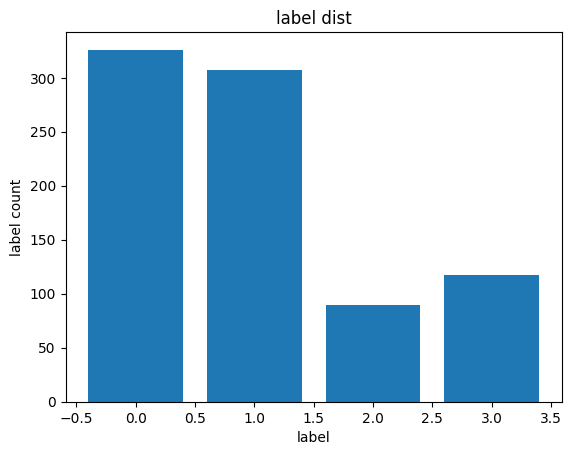

In [8]:
import matplotlib.pyplot as plt
labels = train_dataset[ :, -1]  # 提取标签
label_counts = np.bincount(labels.astype(int).flatten())
unique_labels = np.unique(labels)
plt.bar(unique_labels, label_counts)
plt.xlabel('label')
plt.ylabel('label count')
plt.title('label dist')
plt.show()


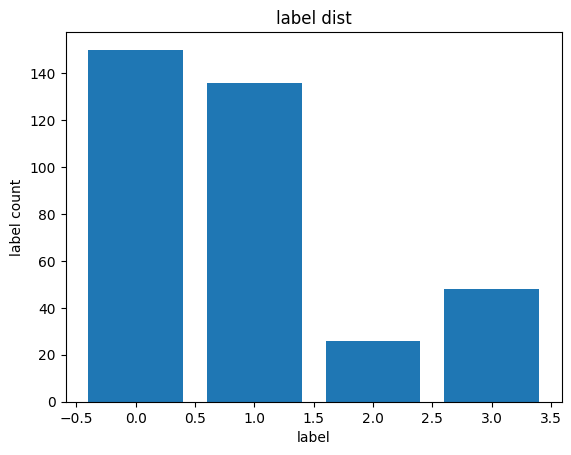

In [9]:
import matplotlib.pyplot as plt
labels = val_dataset[ :, -1]  # 提取标签
label_counts = np.bincount(labels.astype(int).flatten())
unique_labels = np.unique(labels)
plt.bar(unique_labels, label_counts)
plt.xlabel('label')
plt.ylabel('label count')
plt.title('label dist')
plt.show()

In [12]:
# 创建出对应的目录
!mkdir -p dataset
!mkdir -p dataset/train
!mkdir -p dataset/val
!mkdir -p dataset/test
#  保存处理过的数据
np.save('dataset/train/data.npy',train_dataset)
np.save('dataset/val/data.npy',val_dataset)

In [11]:
from utils import MyDataset
from torch.utils.data import DataLoader

# 测试输出
dataset = MyDataset('dataset/train', mean, std)
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)
for data, label in dataloader:
    print(data.shape)
    print(label.shape)
    break
    

torch.Size([2, 1000])
torch.Size([2])
